In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Преобразование Хаара

#### 1.1 Прямое преобразование Хаара

Пусть имеется некоторый входной сигнал $s$. Преобразование Хаара перого уровня определяется как
$$
    s \mapsto^{H_1} (a^1 | d^1),
$$
где
$$
    a^1_n = \frac{s_{2n - 1} + s_{2n}}{\sqrt{2}},\ n=1,\ldots,N/2
$$
$$
    d^1_n = \frac{s_{2n - 1} - s_{2n}}{\sqrt{2}}, \ n=1,\ldots,N/2.
$$

#### Пример 1.1
Применим преобразование Хаара к последовательности $s = (4, 6, 10, 12, 8, 6, 5, 5)$.

In [2]:
s = np.array([4, 6, 10, 12, 8, 6, 5, 5])
a = (s[::2] + s[1::2]) / np.sqrt(2)
d = (s[::2] - s[1::2]) / np.sqrt(2)

In [3]:
print(a)
print(d)

[ 7.07106781 15.55634919  9.89949494  7.07106781]
[-1.41421356 -1.41421356  1.41421356  0.        ]


#### 1.2 Обратное преобразование Хаара

Обратное преобразование первого уровня определяется как
$$
    (a^1 | d^1) \mapsto^{H_1^{-1}} s,
$$
где
$$
    s = (\frac{a^1_1 + d^1_1}{\sqrt{2}}, \frac{a^1_1 - d^1_1}{\sqrt{2}}, \
         \ldots, \
         \frac{a^1_{N/2} + d^1_{N/2}}{\sqrt{2}}, \
         \frac{a^1_{N/2} - d^1_{N/2}}{\sqrt{2}})
$$

#### Пример 1.2
Пременим обратное преобразование к вычисленным в примере 1.1 $(a^1 | d^1)$.

In [4]:
s = np.zeros(s.shape)
s[::2] = (a + d) / np.sqrt(2)
s[1::2] = (a - d) / np.sqrt(2)

In [5]:
print(s)

[ 4.  6. 10. 12.  8.  6.  5.  5.]


#### 1.3 Многоуровневое преобразование Хаара

Преобразование Хаара уровня $m$ сигнала $s$ определяется как
$$
    s \mapsto^{H_m} (a^m | d^m | d^{m -1} | \ldots | d^1),
$$
где $a^1$ и $d^1$ определяются по уже известным формулам,
а остальные коэффициенты вычисляются по формулам
$$
    a^{k} = \frac{a^{k - 1}_{2n - 1} + a^{k - 1}_{2n}}{\sqrt{2}},
       \ n=1,\ldots,\dim{a^{k - 1}}/2
$$
$$
    d^{k} = \frac{a^{k - 1}_{2n - 1} - a^{k - 1}_{2n}}{\sqrt{2}},
       \ n=1,\ldots,\dim{a^{k - 1}}/2
$$

#### Пример 1.3
Многоуровневое преобразование Хаара для сигнала из примера 1.1.

In [6]:
def haar_tranform(s, level=1):
    result = []
    count = 0
    a_prev = s
    for l in range(level):
        a = (a_prev[::2] + a_prev[1::2]) / np.sqrt(2)
        d = (a_prev[::2] - a_prev[1::2]) / np.sqrt(2)
        a_prev = a
        result.append(d)
        
        count += d.shape[0]
    result.append(a)
    result.reverse()
    
    count += a.shape[0]
    
    return count, result

In [7]:
n, c1 = haar_tranform(s, level=1)
n, c1

(8,
 [array([ 7.07106781, 15.55634919,  9.89949494,  7.07106781]),
  array([-1.41421356, -1.41421356,  1.41421356,  0.        ])])

In [8]:
n, c2 = haar_tranform(s, level=2)
n, c2

(8,
 [array([16., 12.]),
  array([-6.,  2.]),
  array([-1.41421356, -1.41421356,  1.41421356,  0.        ])])

In [9]:
n, c3 = haar_tranform(s, level=3)
n, c3

(8,
 [array([19.79898987]),
  array([2.82842712]),
  array([-6.,  2.]),
  array([-1.41421356, -1.41421356,  1.41421356,  0.        ])])

In [58]:
def haar_reverse_transform(c, level=2):
    assert(len(c) >= 2)
    
    a_prev = c[0]
    for i in range(1, level):
        s = np.zeros(2 * a_prev.shape[0])
        s[::2] = (a_prev + c[i]) / np.sqrt(2)
        s[1::2] = (a_prev - c[i]) / np.sqrt(2)
        
        a_prev = s
    return s

In [11]:
haar_reverse_transform(c1)

array([ 4.,  6., 10., 12.,  8.,  6.,  5.,  5.])

In [12]:
haar_reverse_transform(c2)

array([ 4.,  6., 10., 12.,  8.,  6.,  5.,  5.])

In [13]:
haar_reverse_transform(c3)

array([ 4.,  6., 10., 12.,  8.,  6.,  5.,  5.])

In [14]:
s = np.random.randint(10, size=128)

#### 1.4 Преобразование Хаара и сохренение энергии

Пусть дан сигнл $s$. Энергией сигнала называется величина
$$
    E_s = \sum_{i = 1}^N s_i^2.
$$
Возьмем сигнал из примера 1.1 и вычислим его энергию:

In [15]:
s = np.array([4, 6, 10, 12, 8, 6, 5, 5])
e = np.sum(s ** 2)
print(e)

446


Теперь применим преобразование Хаара первого уровня и посчитаем энергию
$a^1$ и $d^1$:

In [16]:
num, c = haar_tranform(s)
e1 = np.sum(c[0] ** 2)
e2 = np.sum(c[1] ** 2)
e1 + e2

445.99999999999994

**Сохранение энергии**: преобразование Хаара первого уровня полностью сохраняет всю энергию сигнала.

При этом интересно следующее:

In [17]:
e1 / e

0.9865470852017936

In [18]:
e2 / e

0.013452914798206273

Почти 98.7\% всей энергии сигнала сосредоточено в $a^1$!
Данное свойство называется **уплотнением энергии**.

Теперь проделаем аналогичные вычисления для преобразования уровня три:

In [19]:
num, c = haar_tranform(s, level=3)
e = np.zeros(4)
for i in range(e.shape[0]):
    e[i] = np.sum(c[i] ** 2)
e

array([392.,   8.,  40.,   6.])

In [20]:
e / np.sum(s ** 2)

array([0.87892377, 0.01793722, 0.0896861 , 0.01345291])

Теперь в $a^3$ содержится только 88\% энергии исходного сигнала.
Это хорошо согласуется с соотношением неопределенностей Гейзенберга:
$$
    \Delta E \Delta t \ge \frac{\hbar}{2}
$$
*Чем больше мы хотим локализовать энергию по $t$, тем больше становится
ошибка ее измерения $\Delta E$*

### 2. Вейвлеты Хаара

Вейвлеты Хаара первого уровня определяются как
$$
W_1^1 = (\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}}, 0, 0, \ldots, 0)
$$
$$
W_2^1 = (0, 0, \frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}}, 0, 0, \ldots, 0)
$$
$$ \vdots $$
$$
W_{N/2}^1 = (0, 0, \ldots, 0, \frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}})
$$

*Свойства:* энергия каждого вейвлета равна 1, а среднее занчение равно 0.


Вернемся к преобразованию Хаара. Вектор $d^1$ может быть представлен как
$$
    d^1 = (s \cdot W_1^1, s \cdot W_2^1, \ldots, s \cdot W_{N/2}^1)
$$

Для описания $a^1$ необходимо ввести маштабирующие векторы
$$
V_1^1 = (\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}, 0, 0, \ldots, 0)
$$
$$
V_2^1 = (0, 0, \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}, 0, 0, \ldots, 0)
$$
$$ \vdots $$
$$
V_{N/2}^1 = (0, 0, \ldots, 0, \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}})
$$
Их энегрия также равна 1, но среднее равно $1/ \sqrt{2}$.


$$
    a^1 = (s \cdot V_1^1, s \cdot V_2^1, \ldots, s \cdot V_{N/2}^1)
$$

### 3. Multiresolution analysis

Определим элементарные сигналы как
$$
    V_1^0 = (1, 0, 0, \ldots, 0)
$$
$$
    V_2^0 = (0, 1, 0, \ldots, 0)
$$
$$
    V_N^0 = (0, 0, \ldots, 0, 1)
$$

Тогда сигнал $s$ может быть представлен в виде
$$
    s = s_1 V_1^0 + s_2 V_2^0 + \ldots + f_N V_N^0
$$
Иначе говоря, мы получили разложение сигнала $s$ по базису.

С помощью преобразования Хаара можно представить сигнал $s$
в виде суммы
$$
    s = A^1 + D^1,
$$
где
$$
    A^1 = \frac{1}{\sqrt{2}}(a_1, a_1, a_2, a_2, \ldots, a_{N/2}, a_{N/2})
$$
$$
    D^1 = \frac{1}{\sqrt{2}}(d_1, -d_1, d_2, -d_2, \ldots, d_{N/2}, -d_{N/2})
$$

$A^1$ - первый усредняющий сигнал, $D^1$ - первый уточняющий сиганал.

Данные сигналы тоже можно разложить:
$$
    A^1 = a_1 V_1^1 + a_2 V_2^1 + \ldots + a_{N/2}V_{N/2}^1
$$
$$
    D^1 = d_1 W_1^1 + d_2 W_2^1 + \ldots + d_{N/2} W_{N/2}^1
$$

В случае преобразования Хаара уровня 2 получаем
$$
    s = A^2 + D^2 + D^1,
$$
где
$$
    A^1 = A^2 + D^2
$$

В общем случае получаем
$$
    s = A^k + D^k + \ldots + D^2 + D^1
$$

$$
    A^n = \sum_{j = n + 1}^k D^j + A^k
$$

### 4. Сжатие данных

In [45]:
t = np.linspace(0, 2 * np.pi, 4096)
s = np.sin(t)
num, c = haar_tranform(s)
num

4096

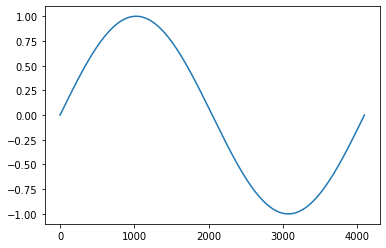

In [46]:
plt.plot(s)

In [47]:
num, c = haar_tranform(c[0], level=6)
num

2048

In [48]:
ss = haar_reverse_transform(c)
ss = 1 / np.sqrt(2) * np.repeat(ss, 2)

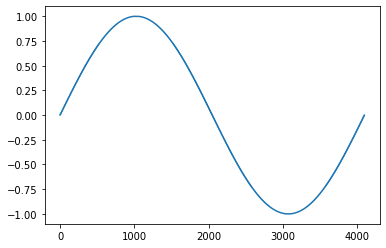

In [49]:
plt.plot(ss)

In [50]:
np.mean((s - ss) ** 2)

2.943525946961736e-07

Реализуем функции для упрощения сжатия:

In [51]:
def haar_compression(s, level=1, comp_level=1):
    assert int(np.log2(s.shape[0])) >= level + comp_level
    
    for i in range(comp_level):
        num, c = haar_tranform(s, level=1)
        s = c[0]
    
    return haar_tranform(s, level)

In [52]:
def haar_decompression(c, comp_level=1):
    s = haar_reverse_transform(c)
    
    for i in range(comp_level):
        s = 1 / np.sqrt(2) * np.repeat(s, 2)
    
    return s

In [53]:
def mse(y, yy):
    return np.mean((y - yy) ** 2)

In [54]:
num, c = haar_compression(s, level=5, comp_level=2)
num

1024

In [31]:
ss = haar_decompression(c, comp_level=2)

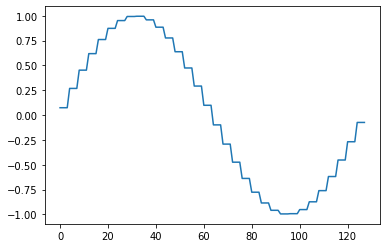

In [32]:
plt.plot(ss)

In [33]:
mse(s, ss)

0.00153998201196504

### 5. Удаление шума

In [55]:
t = np.linspace(0, 6 * np.pi, 4096)
s = np.sin(t)
sn = s + 0.4 * np.random.randn(t.shape[0])

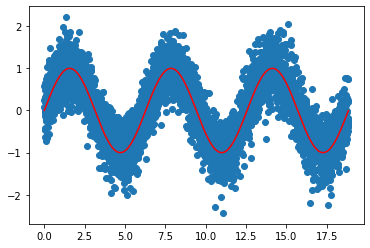

In [56]:
plt.scatter(t, sn)
plt.plot(t, s, 'r')

In [73]:
num, c = haar_tranform(sn, level=7)

In [74]:
cc = np.concatenate(c)

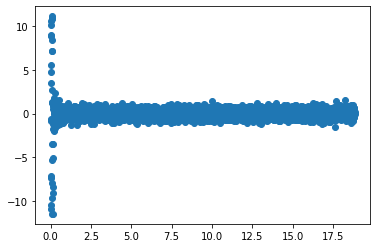

In [75]:
plt.scatter(t, cc)

In [68]:
def haar_denoising(c, threshold):
    for i in range(len(c)):
        c[i][np.abs(c[i]) < threshold] = 0
    return c

In [59]:
#c = haar_denoising(c, 1.0)

In [76]:
ss = haar_reverse_transform(c, level=2)

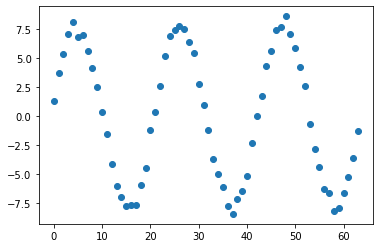

In [77]:
plt.scatter(np.arange(ss.shape[0]), ss)
#plt.plot(t, s, 'r')

In [43]:
mse(s, sn)

0.15532233652550886

In [44]:
mse(s, ss)

0.03894354087046739